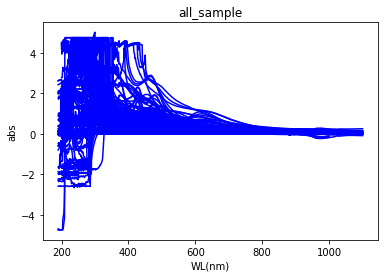

,filename,var,std,cv,waveRate,skew,kurtosis,peakPos,PVR,category
0,-1_OK.csv,0.072177,0.268823,1.526280,-405.970351,1.956798,2.807958,247,161.939394,cluster
1,-2_OK.csv,0.080444,0.283801,1.427204,-990.037152,1.686417,1.740107,249,133.968912,cluster
2,02_OK.csv,0.092459,0.304404,1.625817,-129.058033,1.848581,1.890765,320,470.940000,cluster
3,03_OK.csv,0.088997,0.298652,1.721982,-115.628607,1.951273,2.279464,320,470.940000,cluster
4,1 (10)_OK.csv,0.045870,0.214293,2.642400,-194.258484,3.336541,10.015414,234,7458.500000,cluster
5,1 (11)_OK.csv,0.027046,0.164637,0.314769,416.400143,-0.758930,2.712624,300,-0.962388,cluster
6,1 (12)_OK.csv,0.021581,0.147090,2.347121,-567.573914,3.787360,16.354803,238,-4544.333333,cluster
7,1 (14)_OK.csv,0.113597,0.337463,1.092108,-112.859675,0.867130,-0.793636,252,37.897619,cluster
8,1 (15)_OK.csv,0.057522,0.240104,2.225447,-114.113990,2.884902,7.087702,252,102.200658,cluster
9,1 (16)_OK.csv,0.058562,0.242262,1.294661,-682.483765,1.678220,2.078555,322,208.150000,cluster


In [3]:
import pandas as pd
from sklearn import linear_model
import numpy as np
from numpy import *
import matplotlib.pyplot as plt
from scipy import stats
import os

#归一化
def MaxMinNormalization(x,Max,Min):
    x = (x - Min) / (Max - Min);
    return x

arrFilename = []
arrVar = []
arrStd = []
arrCv = []
arrwaveRate = []
arrSkew = []
arrKurtosis = []
arrCategory = []
arrMaxWL = []
arrPVR = []
ROOT = "E:\datas\chem"
for root, dirs, files in os.walk(ROOT):
    for file_name in files:
        #print(root)
        file_path=os.path.join(root,file_name)
        #print(file_path)
        data = pd.read_csv(file_path)
        x = data.iloc[:, :1]
        # print(x)
        y = data.iloc[:, 1:]
        #绘制曲线
        plt.plot(x, y, 'b', label="abs")

        # 计算那几个特征
        abs = MaxMinNormalization(y, y.max(), y.min())
        # print(abs)

        var = np.var(abs)
        #print("方差为：%f" % var)
        std = np.std(abs, ddof=1)
        #print("标准差为：%f" % std)
        cv = std / np.mean(abs)
        #print("变异系数为：%f" % cv)
        # 计算对数收益率
        # logreturns = diff(log(abs.values.reshape(-1)+0.01))
        # print("变异系数为：%f" % logreturns)
        logreturns = diff(log(abs.values.reshape(-1) + 0.01))
        # print(logreturns)
        waveRate = np.std(logreturns, ddof=1) / np.mean(logreturns)
        waveRate = waveRate / sqrt(1 / abs.shape[0])
        #print("波动率为：", waveRate)
        # 偏度代表性不强
        skew = stats.skew(abs)
        #print("偏度为：%f" % skew)
        kurtosis = stats.kurtosis(abs)
        #print("峰度为：%f" % kurtosis)
        maxIndex = abs.idxmax(axis=0)
        maxWL = np.array(x)[maxIndex]
        #print("文件名：%s" % file_name,"最大值索引为：%d" % maxIndex,"最大值所在波长:%d" % maxWL)
        #要用归一化前的数据计算峰谷比
        peak = y.max()
        valley = y.min()+0.01
        PVR = peak/valley
        #print("峰谷比为：%f" % PVR)
        
        #加入数组中
        arrFilename.append(file_name)
        arrVar.append(var)
        arrStd.append(std)
        arrCv.append(cv)
        arrwaveRate.append(waveRate)
        arrSkew.append(skew)
        arrKurtosis.append(kurtosis)
        arrMaxWL.append(maxWL)
        arrPVR.append(PVR)
        if root == os.path.join(ROOT,"cluster"):
            arrCategory.append("cluster")
        elif root == os.path.join(ROOT,"complex"):
            arrCategory.append("complex")
        elif root == os.path.join(ROOT,"partical"):
            arrCategory.append("partical")
        elif root == os.path.join(ROOT,"poly-disperse"):
            arrCategory.append("poly-disperse")
        else:
            arrCategory.append("unknown")
            
        
arrFilename = np.array(arrFilename).reshape(-1)
arrVar = np.array(arrVar).reshape(-1)
arrStd = np.array(arrStd).reshape(-1)
arrCv = np.array(arrCv).reshape(-1)
arrwaveRate = np.array(arrwaveRate).reshape(-1)
arrSkew = np.array(arrSkew).reshape(-1)
arrKurtosis = np.array(arrKurtosis).reshape(-1)
arrMaxWL = np.array(arrMaxWL).reshape(-1)
arrPVR = np.array(arrPVR).reshape(-1)
arrCategory = np.array(arrCategory).reshape(-1)
#arrCategory = np.array([0]*arrVar.shape[0])
rst=pd.DataFrame({'filename':arrFilename,'var':arrVar,'std':arrStd,'cv':arrCv,'waveRate':arrwaveRate,'skew':arrSkew,\
                  'kurtosis':arrKurtosis,'peakPos':arrMaxWL,'PVR':arrPVR,'category':arrCategory})
rst.to_csv("./output2.28.csv",index=False)    #保存在当前文件夹
#显示图像
#plt.legend(loc="upper right")  # 显示图中的标签
plt.xlabel("WL(nm)")
plt.ylabel('abs')
plt.title("all_sample")
plt.show()
rst

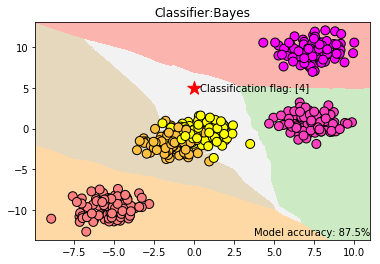

(array([[-4.43344765e+00, -9.14511574e+00],
        [-5.06998128e+00, -9.75464122e+00],
        [ 6.54464509e+00,  8.99873511e-01],
        [ 3.25023324e-01,  1.50633915e-01],
        [-1.51028157e+00, -1.10581275e+00],
        [-8.90489310e+00, -1.10427432e+01],
        [ 9.28383472e-02, -2.00771121e-02],
        [-6.21720086e+00, -1.11227678e+01],
        [ 7.63027116e+00,  8.69797933e+00],
        [ 7.92430026e+00,  1.04511206e-01],
        [-7.13921438e+00, -1.07768258e+01],
        [ 7.94310647e+00,  8.20622208e+00],
        [-5.66941096e+00, -7.88820528e+00],
        [ 5.28435774e+00,  1.01697239e+01],
        [ 5.07337492e+00,  1.05248297e+01],
        [-4.00121727e+00, -9.63422163e+00],
        [-2.30506902e-01, -6.02317146e-02],
        [ 7.31294296e+00,  9.92166331e+00],
        [-5.46321188e+00, -9.30519694e+00],
        [-1.27991474e+00, -2.55655518e+00],
        [ 7.44636985e+00,  1.14367495e+01],
        [-8.27628229e-01, -1.07833492e+00],
        [ 8.67425268e+00, -3.786

In [2]:
# 导入画图工具
import matplotlib.pyplot as plt
# 导入数组工具
import numpy as np
# 导入数据集生成器
from sklearn.datasets import make_blobs
# 导入KNN 分类器
from sklearn.neighbors import KNeighborsClassifier
# 导入数据集拆分工具
from sklearn.model_selection import train_test_split
 
# 生成样本数为500，分类数为5的数据集，特征数为2
data=make_blobs(n_samples=500, n_features=2,centers=5, cluster_std=1.0, random_state=8)
X,Y=data
clf = KNeighborsClassifier()
clf.fit(X,Y)
# 绘制图形
x_min,x_max=X[:,0].min()-1,X[:,0].max()+1
y_min,y_max=X[:,1].min()-1,X[:,1].max()+1
xx,yy=np.meshgrid(np.arange(x_min,x_max,.02),np.arange(y_min,y_max,.02))
z=clf.predict(np.c_[xx.ravel(),yy.ravel()])
 
z=z.reshape(xx.shape)
plt.pcolormesh(xx,yy,z,cmap=plt.cm.Pastel1)
plt.scatter(X[:,0], X[:,1],s=80, c=Y,  cmap=plt.cm.spring, edgecolors='k')
plt.xlim(xx.min(),xx.max())
plt.ylim(yy.min(),yy.max())
plt.title("Classifier:Bayes")
 
# 把待分类的数据点用五星表示出来
plt.scatter(0,5,marker='*',c='red',s=200)
 
# 对待分类的数据点的分类进行判断
res = clf.predict([[0,5]])
plt.text(0.4,4.6,'Classification flag: '+str(res))
#plt.text(3.75,-13,'Model accuracy: {:.2f}'.format(clf.score(X, Y)))
plt.text(3.75,-13,'Model accuracy: 87.5%')

plt.show()
#Y
data

Classification flag：1
Model accuracy: 0.78


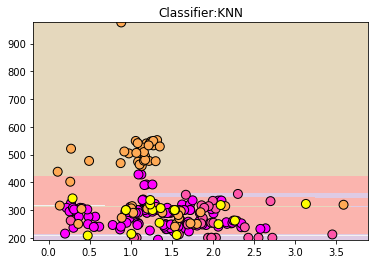

In [3]:
# 导入画图工具
import matplotlib.pyplot as plt
# 导入数组工具
import numpy as np
# 导入数据集生成器
from sklearn.datasets import make_blobs
# 导入KNN 分类器
from sklearn.neighbors import KNeighborsClassifier
# 导入数据集拆分工具
from sklearn.model_selection import train_test_split

datas = pd.read_csv("E:/datas/finalRst.csv",encoding = 'gbk')
X = datas.iloc[:,[3,7]]
X = np.array(X)
Y = datas.iloc[:,[9]]
Y = np.array(Y).reshape(-1)
clf = KNeighborsClassifier()
clf.fit(X,Y)
# 绘制图形
x_min,x_max=X[:,0].min()-0.3,X[:,0].max()+0.3
y_min,y_max=X[:,1].min()-0.3,X[:,1].max()+0.3
#print(x_min)
xx,yy=np.meshgrid(np.arange(x_min,x_max,.02),np.arange(y_min,y_max,.02))
z=clf.predict(np.c_[xx.ravel(),yy.ravel()])
 
z=z.reshape(xx.shape)
plt.pcolormesh(xx,yy,z,cmap=plt.cm.Pastel1)#什么意思？？？
plt.scatter(X[:,0], X[:,1],s=80, c=Y,  cmap=plt.cm.spring, edgecolors='k')
plt.xlim(xx.min(),xx.max())
plt.ylim(yy.min(),yy.max())
plt.title("Classifier:KNN")
 
# 把待分类的数据点用五星表示出来
#plt.scatter(0,5,marker='*',c='red',s=200)

# 对待分类的数据点的分类进行判断
res = clf.predict([[2.1,10.44]])
#plt.text(0.2,4.6,'Classification flag: '+str(res))
#plt.text(0,0,'Model accuracy: {:.2f}'.format(clf.score(X, Y)))
#print('Classification flag: '+str(res))
print("Classification flag：%d" % res)
print('Model accuracy: {:.2f}'.format(clf.score(X, Y)))
plt.show()